# 4. Model Learning #
## 4.1 linear regression ##

#### linear reg ####
$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $ <br>
$ \hat{y}\ is\ prediction $ <br>
$ and,\ \hat{y} = h_\theta(x) = \theta^T \cdot x $
<br>
#### goal : ####
find $\theta$ to minimize RMSE(MSE) <br>
$MSE(X, h_\theta) = \displaystyle\frac{1}{m} \sum_{i=1}^{m}(\theta^T \cdot x^{(i)} - y^{(i)})^2 $

### 4.1.1 Normal Equation ###
$ \hat\theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

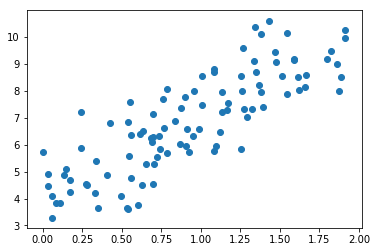

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X +np.random.randn(100, 1)
plt.scatter(X, y)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.08652288]
 [2.96220864]]


In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 4.08652288]
 [10.01094017]]


[0, 2, 0, 15]

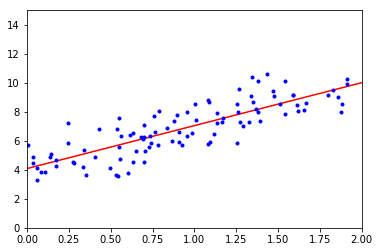

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

In [9]:
## sklearn 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([4.08652288]), array([[2.96220864]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.08652288],
       [10.01094017]])

## 4.2 Gradient Descent ## 
### 4.2.1 Batch Gradient Descent ###
partial derivative = diffrent cost function when $ \theta_j $ to changed slightly <br>
$ \displaystyle\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^T \cdot x^{(i)} - y^{(i)})x_j^{(i)} $
<br>
$ \nabla_\theta MSE(\theta) = \frac{2}{m} X^T \cdot (X \cdot \theta - y) \\ $ <br>
$ \theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta) \\ $ <br>
$ \eta = Learning \ Rate $

In [14]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients
print(theta)

[[4.08652288]
 [2.96220864]]


### 4.2.2 Stochastic Gradient Descent ###

In [25]:
n_epoch = 10

theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = xi.T.dot(xi.dot(theta) - yi)
        theta -= eta * gradients
print(theta)

[[4.24737132]
 [3.48885356]]


In [44]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [45]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)


In [46]:
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.17329561]), array([3.02816054]))

### 4.2.3 Mini-batch Gradient Descent ###
learning with batch(a randomly sample sets)

In [52]:
n_epoch = 5
batch_size = 5
theta = np.random.randn(2, 1)
for epoch in range(n_epoch):
    random_i = np.random.randint(m-batch_size)
    xi = X_b[random_i : random_i + batch_size]
    yi = y[random_i : random_i + batch_size]
    gradient = xi.T.dot(xi.dot(theta) - yi)
    theta -= eta * gradient
print(theta)

[[3.73181486]
 [3.25691951]]


## 4.3 Polynomial Regression ##

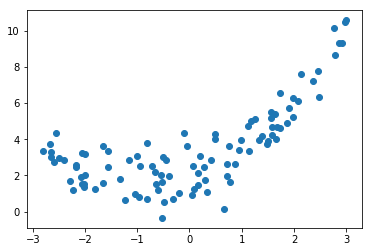

In [54]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

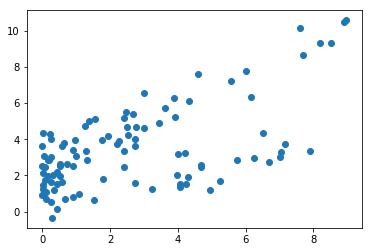

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(X)
plt.scatter(x_poly[:, 1], y)

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02760084]), array([[0.95544465, 0.54400802]]))

In [85]:
target = lin_reg.coef_[:,1] * X**2 + lin_reg.coef_[:,0] * X + lin_reg.intercept_

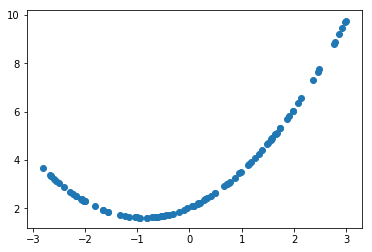

In [110]:
plt.scatter(X, target)

## 4.4 learning curve ##

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "validation")
    plt.legend()

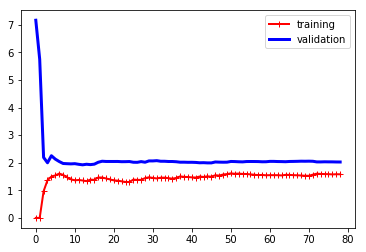

In [120]:
plot_learning_curve(lin_reg, X, y)

## 4.5 Linear Model with Reguration ##
the good way to reduce overfitting <br>
basically restrict weight in linear model


### 4.5.1 Ridge Regression ###
<br>
added $ \alpha \sum_{i=1}^n \theta_i^2 $  to cost function when training but not add when validation. <br>
<br>
$ Cost \ Function \\ 
\ \displaystyle J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2 $ <br>
$ Normal \ Equation \\
\ \hat\theta = (X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y $

In [123]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.93011568]])

In [125]:
ridge_reg.intercept_, ridge_reg.coef_

(array([3.47038102]), array([[0.97315644]]))

In [128]:
## sgd regressor penalty = 'l2' is ridge reg ##
sgd_reg = SGDRegressor(max_iter=5, penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])
sgd_reg.intercept_, sgd_reg.coef_

(array([2.62830299]), array([0.96055526]))

### 4.5.2 Lasso (Least Absolute Shrinkage and Selection Operator) Reg ###
unuseful weight made to zero <br>
used l1 norm instead l2 norm <br><br>
$ Cost \ Function \\
\ J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n |\theta_i| $

In [131]:
## penalty = 'l1' is Lasso reg ##
sgd_reg = SGDRegressor(max_iter = 5, penalty = 'l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])
sgd_reg.intercept_, sgd_reg.coef_

(array([2.63838265]), array([0.9727366]))

### 4.5.3 Elastic Net ###
merge from Ridge, Lasso <br>
merge ratio , $r$ <br>
$ if \ r=0, \ equal \  Ridge \\
else \ r=1, \ equal \  Lasso $ <br>
$ Cost \ Function \\
J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^n|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2 $

In [133]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.88171978])

### 4.5.4 early stopping ###
if loss value attain by minimum error value then stopped fitting. <br>
(code skip)

## 4.6 Logistic Regression ##

### 4.6.1 logistic ###
$ \hat p = h_\theta(x) = \sigma(\theta^T \cdot x) \\
\sigma() \ is \ doing \  output \ 0\sim1, \  it \  is \ sigmoid. \\
Logistic \ function \\
\displaystyle\sigma(t) = \frac{1}{1+exp(-t)}
$

### 4.6.2 trainnig and cost function ###
(skip)

### 4.6.3 decision boundary ###


In [137]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data'][:,3:] ## width size petal
y = (iris['target'] == 2).astype(np.int8)

In [138]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

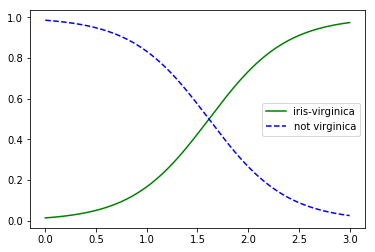

In [139]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'iris-virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'not virginica')
plt.legend()

### 4.6.4 Softmax Regression ###
multinomial Logistic Regression
<br><br>
$
1. \ softmax \ score \ with \ class \ K \\
\ s_k(x) = (\theta^{(k)})^T \cdot x $ <br>
<br>
$2. \ softmax \ function \\
\ \hat p_k = \sigma(s(x))_k = \displaystyle\frac{exp(s_k(x))}{\sum_{j=1}^k exp(s_j(x))}
$ <br><br>
$3. predict \\
\hat y = argmax(\sigma(s(x))_k) = argmax(s_k(x)) = argmax((\theta^{(k)})^T \cdot x) $
<br>
#### cross entropy function ####
$ \displaystyle J(\Theta) = - \frac{1}{m}\sum_{i=1}^m \sum_{k=1}^k y_k^{(i)}log(\hat p_k^{(i)}) $ <br>
$ \nabla_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i=1}^m(\hat p_k^{(i)} - y_k^{(i)})x^{(i)} $

In [141]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [143]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = 'lbfgs', C=10)
softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]])

array([2])

In [144]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])